# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Creating Datasets (NumPy)

In [2]:
# 1. Create stock_1 array
Stock_1 = np.arange(20.5, 50, 3)
Stock_1

array([20.5, 23.5, 26.5, 29.5, 32.5, 35.5, 38.5, 41.5, 44.5, 47.5])

In [3]:
# 2. Create stock_2 array
Stock_2 = np.arange(80, 60, -2)
Stock_2

array([80, 78, 76, 74, 72, 70, 68, 66, 64, 62])

In [4]:
# 3. Generate stock_3 array with random values
Stock_3 = np.random.randint(30,51,size=10)
Stock_3

array([47, 48, 34, 45, 30, 34, 39, 39, 33, 35])

In [5]:
# 4. Create stock_4 array
Stock_4 = np.full_like(Stock_1, fill_value=8)
Stock_4

array([8., 8., 8., 8., 8., 8., 8., 8., 8., 8.])

In [6]:
# 5. Generate trading_vol array with random integer values
Trading_Vol = np.random.randint(1000, 1501, size=10)
Trading_Vol

array([1242, 1394, 1351, 1456, 1207, 1019, 1394, 1094, 1461, 1102])

In [7]:
# 6. Combine arrays into a single 2D array
Stock_Prices = np.array([Stock_1, Stock_2, Stock_3, Stock_4, Trading_Vol]).T
Stock_Prices

array([[  20.5,   80. ,   47. ,    8. , 1242. ],
       [  23.5,   78. ,   48. ,    8. , 1394. ],
       [  26.5,   76. ,   34. ,    8. , 1351. ],
       [  29.5,   74. ,   45. ,    8. , 1456. ],
       [  32.5,   72. ,   30. ,    8. , 1207. ],
       [  35.5,   70. ,   34. ,    8. , 1019. ],
       [  38.5,   68. ,   39. ,    8. , 1394. ],
       [  41.5,   66. ,   39. ,    8. , 1094. ],
       [  44.5,   64. ,   33. ,    8. , 1461. ],
       [  47.5,   62. ,   35. ,    8. , 1102. ]])

# Analysis (Pandas)

In [8]:
# 1. Convert NumPy array to Pandas DataFrame
Stocks = pd.DataFrame(Stock_Prices, columns=['Stock_1', 'Stock_2', 'Stock_3', 'Stock_4', 'Trading_Vol'], index=np.arange(1, 11))
Stocks.rename_axis('Day',inplace=True)
Stocks

,Stock_1,Stock_2,Stock_3,Stock_4,Trading_Vol
Day,,,,,
1,20.5,80.0,47.0,8.0,1242.0
2,23.5,78.0,48.0,8.0,1394.0
3,26.5,76.0,34.0,8.0,1351.0
4,29.5,74.0,45.0,8.0,1456.0
5,32.5,72.0,30.0,8.0,1207.0
6,35.5,70.0,34.0,8.0,1019.0
7,38.5,68.0,39.0,8.0,1394.0
8,41.5,66.0,39.0,8.0,1094.0
9,44.5,64.0,33.0,8.0,1461.0


In [9]:
# 2. Print head and tail
print("Head:")
Stocks.head(3)

Head:


,Stock_1,Stock_2,Stock_3,Stock_4,Trading_Vol
Day,,,,,
1,20.5,80.0,47.0,8.0,1242.0
2,23.5,78.0,48.0,8.0,1394.0
3,26.5,76.0,34.0,8.0,1351.0


In [10]:
# 2. Print head and tail
print("Tail:")
Stocks.tail(3)

Tail:


,Stock_1,Stock_2,Stock_3,Stock_4,Trading_Vol
Day,,,,,
8,41.5,66.0,39.0,8.0,1094.0
9,44.5,64.0,33.0,8.0,1461.0
10,47.5,62.0,35.0,8.0,1102.0


In [11]:
# 3. Average stock price for each stock
Avg_Prices = Stocks.mean()
print("\nAverage Stock-Price for each Stock:")
Avg_Prices


Average Stock-Price for each Stock:


Stock_1          34.0
Stock_2          71.0
Stock_3          38.4
Stock_4           8.0
Trading_Vol    1272.0
dtype: float64

In [12]:
# 4. Price of stock_1 on days stock_2 > average price of stock_2
print("\nStock 1 Price on days when Stock 2 Price was greater than its Average:")
Stocks['Stock_1'][Stocks['Stock_2'] > Avg_Prices['Stock_2']]


Stock 1 Price on days when Stock 2 Price was greater than its Average:


Day
1    20.5
2    23.5
3    26.5
4    29.5
5    32.5
Name: Stock_1, dtype: float64

In [13]:
# Assuming PCT_Change is a DataFrame with percentage change in price for each stock
PCT_Change = ((Stocks.drop(['Trading_Vol'], axis=1)).pct_change() * 100).dropna()
print("\nPercentage change in price for each stock:")
PCT_Change


Percentage change in price for each stock:


,Stock_1,Stock_2,Stock_3,Stock_4
Day,,,,
2,14.634146,-2.500000,2.127660,0.0
3,12.765957,-2.564103,-29.166667,0.0
4,11.320755,-2.631579,32.352941,0.0
5,10.169492,-2.702703,-33.333333,0.0
6,9.230769,-2.777778,13.333333,0.0
7,8.450704,-2.857143,14.705882,0.0
8,7.792208,-2.941176,0.000000,0.0
9,7.228916,-3.030303,-15.384615,0.0
10,6.741573,-3.125000,6.060606,0.0


In [14]:
# 6. Correlation between Stock-Price and Trading Volume
print("\nCorrelation between Stock-Price and Trading Volume:")
correlation=((Stocks.corr()).drop(['Stock_1', 'Stock_2', 'Stock_3', 'Stock_4'],axis=1)).drop(['Trading_Vol'])
correlation


Correlation between Stock-Price and Trading Volume:


,Trading_Vol
Stock_1,-0.278032
Stock_2,0.278032
Stock_3,0.321754
Stock_4,NaN


In [15]:
# 7. Rank of each day based on the price of stock_3
Ranked_Stock_3 = Stocks['Stock_3'].rank(ascending=False)  # Ranking the prices of Stock_3
print("\nRank of each day based on the Price of Stock_3:")
print(Ranked_Stock_3.astype(int))  # Converting ranks to integers for better readability


Rank of each day based on the Price of Stock_3:
Day
1      2
2      1
3      7
4      3
5     10
6      7
7      4
8      4
9      9
10     6
Name: Stock_3, dtype: int32


# Visualisation (Matplotlib)

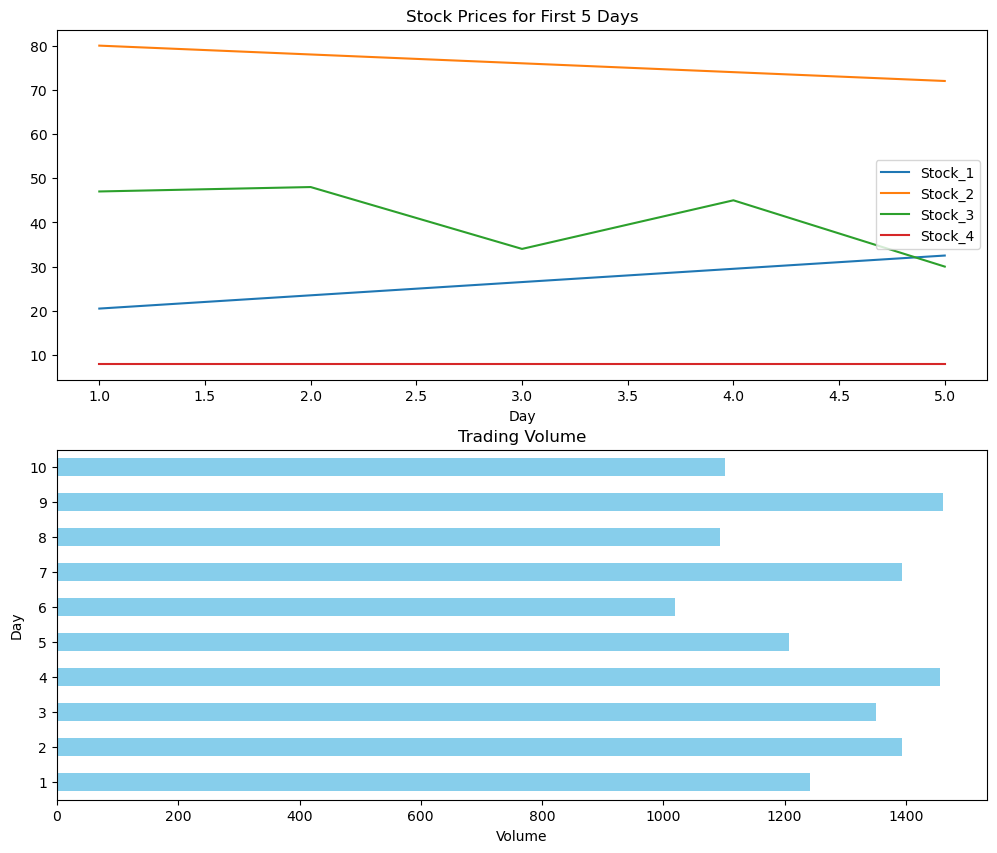

In [17]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# a. Line plot for first 5 days
Stocks.iloc[:5, :4].plot(ax=axes[0])
axes[0].set_title('Stock Prices for First 5 Days')
axes[0].legend()

# b. Horizontal bar graph for trading volume
Stocks['Trading_Vol'].plot(kind='barh', ax=axes[1], color='skyblue')
axes[1].set_title('Trading Volume')
axes[1].set_xlabel('Volume')

plt.show()


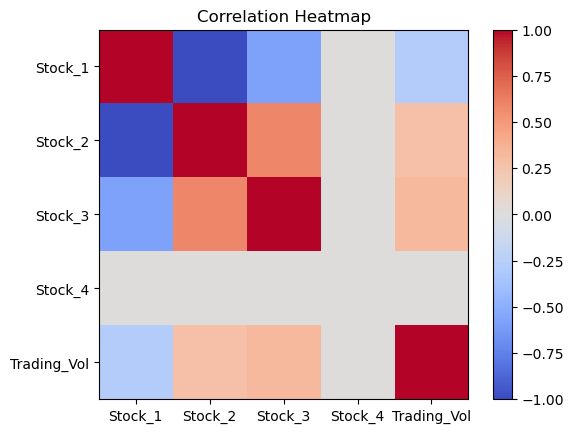

In [18]:
plt.figure()
# Create the heatmap
heatmap = plt.imshow((Stocks.corr()).fillna(0), cmap='coolwarm', interpolation='nearest')
# Add colorbar to show the scale
plt.colorbar(heatmap)
# Set title
plt.title('Correlation Heatmap')
# Set x and y labels
plt.xticks(np.arange(len(Stocks.columns)), Stocks.columns)
plt.yticks(np.arange(len(Stocks.columns)), Stocks.columns)

# Show the plot
plt.show()